In [17]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
caminho_dataset = r'C:\Faculdade\FeatureAndML\FeatureEngineering_tp3\aclImdb'
caminho_treino = os.path.join(caminho_dataset, 'train')
categorias = ['pos', 'neg']

dados_treino = load_files(
    container_path=caminho_treino,
    categories=categorias,
    encoding='utf-8',
    decode_error='replace'
)

print(f"Total de reviews carregados: {len(dados_treino.data)}")
print(f"Categorias: {dados_treino.target_names}")


Total de reviews carregados: 25000
Categorias: ['neg', 'pos']


In [11]:
# Questão 1
vetorizador_tfidf = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words='english'
)

X_tfidf = vetorizador_tfidf.fit_transform(dados_treino.data)

print(f"Shape da matriz TF-IDF: {X_tfidf.shape}")  # (n_amostras, n_features)
print(f"Número de features extraídas: {len(vetorizador_tfidf.get_feature_names_out())}")

Shape da matriz TF-IDF: (25000, 26967)
Número de features extraídas: 26967


In [12]:
features_amostradas = vetorizador_tfidf.get_feature_names_out()[:20]
print("Algumas das features extraídas:", features_amostradas)

Algumas das features extraídas: ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103']


In [13]:
#Questão 2 
nomes_features = vetorizador_tfidf.get_feature_names_out()
media_tfidf_por_feature = np.asarray(X_tfidf.mean(axis=0)).flatten()
df_tfidf = pd.DataFrame({
    'feature': nomes_features,
    'media_tfidf': media_tfidf_por_feature
})

top_10 = df_tfidf.sort_values(by='media_tfidf', ascending=False).head(10)
print("🔝 Top 10 features com maior valor médio de TF-IDF:")
print(top_10)

bottom_10 = df_tfidf[df_tfidf['media_tfidf'] > 0].sort_values(by='media_tfidf').head(10)
print("\n🔽 10 features com menor valor médio de TF-IDF:")
print(bottom_10)


🔝 Top 10 features com maior valor médio de TF-IDF:
      feature  media_tfidf
3011       br     0.091925
15840   movie     0.049156
9146     film     0.040346
14050    like     0.023118
13208    just     0.021791
10355    good     0.020764
19342  really     0.017536
23018   story     0.017313
24320    time     0.017092
1935      bad     0.016557

🔽 10 features com menor valor médio de TF-IDF:
             feature  media_tfidf
23443       suplexes     0.000008
21478   sharpshooter     0.000013
5797   cruiserweight     0.000013
9998          gauche     0.000013
18468     pressuring     0.000013
10257        gliding     0.000014
25754       vertical     0.000014
9901       galadriel     0.000014
6482     deportation     0.000014
16764       oncoming     0.000014


In [ ]:
# Questão 3
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, 
    dados_treino.target, 
    test_size=0.2, 
    random_state=42,
    stratify=dados_treino.target
)
modelo_lr = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear é bom para datasets menores e esparsos
modelo_lr.fit(X_train, y_train)
y_pred = modelo_lr.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)

print(f"🔍 Acurácia do modelo de Regressão Logística: {acuracia:.4f}")

🔍 Acurácia do modelo de Regressão Logística: 0.8896


C:\Users\Afect\AppData\Local\Temp\ipykernel_7552\2036393951.py:20: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Afect\miniconda3\envs\infnet-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


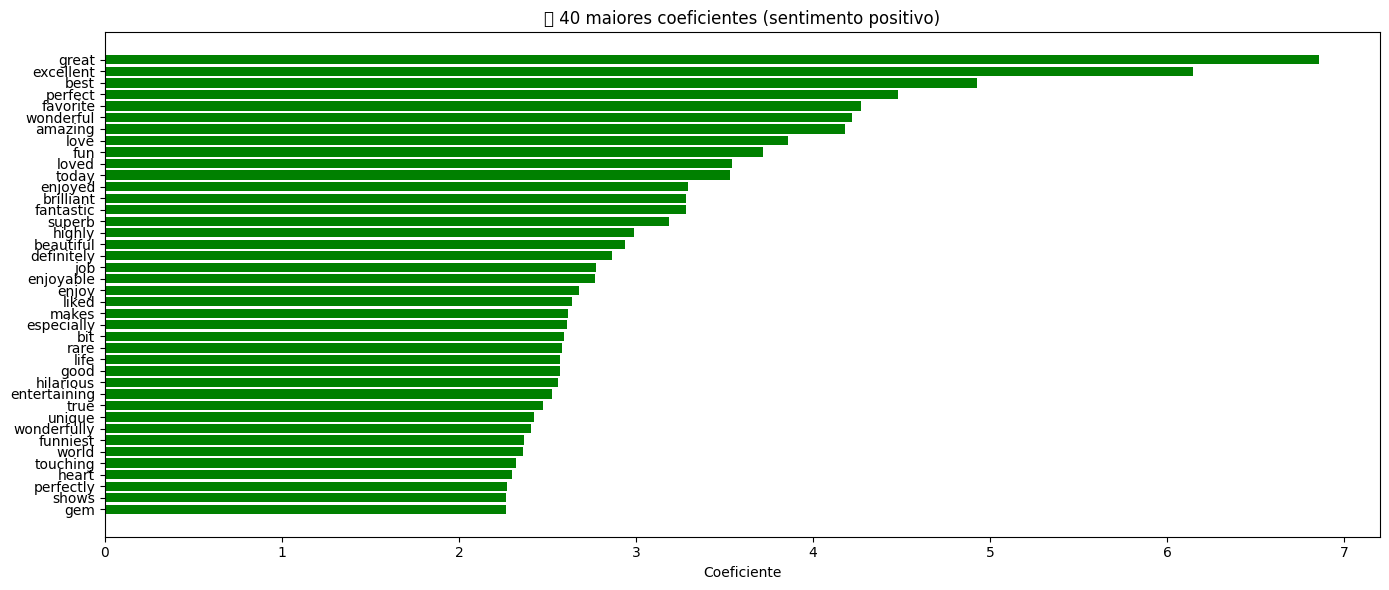

C:\Users\Afect\AppData\Local\Temp\ipykernel_7552\2036393951.py:29: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Afect\miniconda3\envs\infnet-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


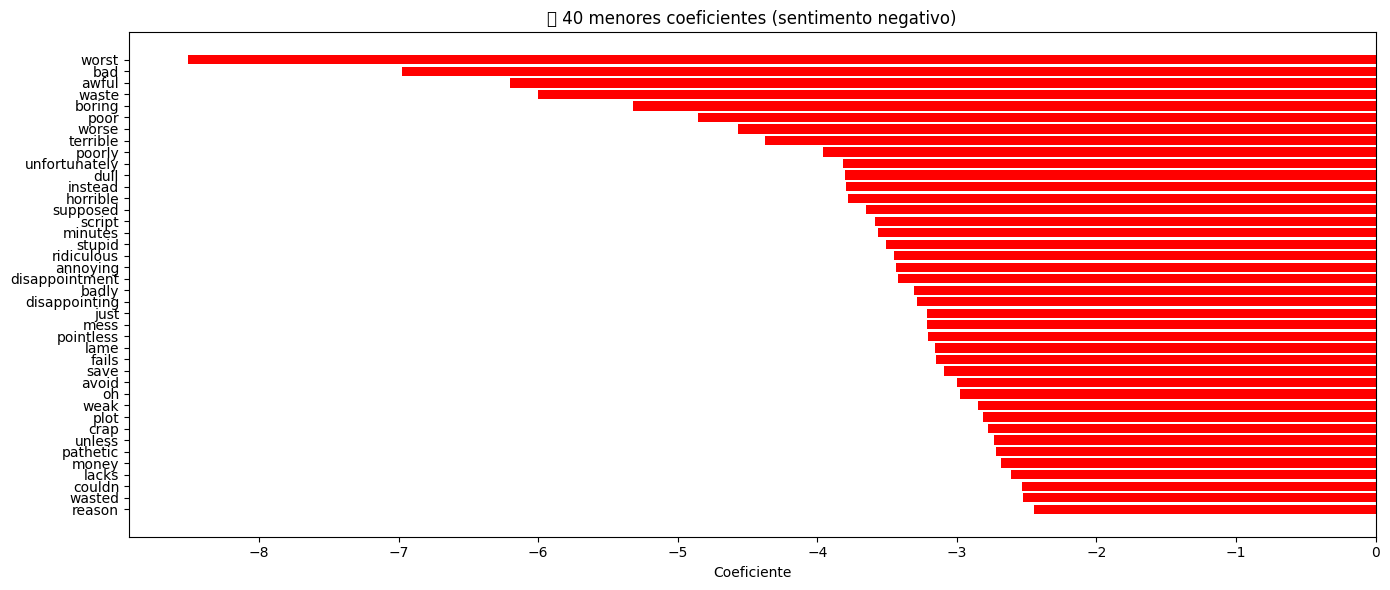

In [19]:
nomes_features = vetorizador_tfidf.get_feature_names_out()
coeficientes = modelo_lr.coef_[0]
df_coef = pd.DataFrame({
    'feature': nomes_features,
    'coeficiente': coeficientes
})

# Top 40 maiores coeficientes (associados a sentimento positivo)
top_40 = df_coef.sort_values(by='coeficiente', ascending=False).head(40)

# Bottom 40 menores coeficientes (associados a sentimento negativo)
bottom_40 = df_coef.sort_values(by='coeficiente').head(40)

# Plotar top 40
plt.figure(figsize=(14, 6))
plt.barh(top_40['feature'], top_40['coeficiente'], color='green')
plt.xlabel('Coeficiente')
plt.title('🔝 40 maiores coeficientes (sentimento positivo)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plotar bottom 40
plt.figure(figsize=(14, 6))
plt.barh(bottom_40['feature'], bottom_40['coeficiente'], color='red')
plt.xlabel('Coeficiente')
plt.title('🔽 40 menores coeficientes (sentimento negativo)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A análise dos 40 maiores e menores coeficientes da regressão logística aplicada ao dataset de resenhas demonstra, em grande parte, coerência com o objetivo de classificar sentimentos.

Entre os maiores coeficientes, palavras como great, excellent, amazing e love indicam clara associação com sentimentos positivos. 
Já entre os menores coeficientes, termos como worst, awful, boring e waste são representativos de avaliações negativas. Isso confirma que o modelo está capturando bem a polaridade emocional do vocabulário.

No entanto, observa-se a presença de palavras ambíguas ou genéricas, como just, job, plot, minutes e money, que, isoladamente, não expressam sentimento. 
Elas podem ter recebido coeficientes altos ou baixos por aparecerem frequentemente em construções específicas (“just awful”, “good job”, “wasted minutes”), o que revela uma limitação do modelo baseado apenas em unigramas TF-IDF.

Essa abordagem não considera o contexto completo da frase, podendo supervalorizar correlações estatísticas frágeis. 
Como alternativa, recomenda-se o uso de n-gramas ou representações contextuais mais avançadas, como word embeddings ou transformers, para melhorar a robustez e a precisão da análise de sentimentos